In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('ggplot')

In [218]:
n_samples = 2000
random_state = 2022
X1, y1 = make_blobs(n_samples=n_samples, random_state=random_state, centers=[(-1,-2), (2,2)])
X2, y2 = make_circles(n_samples=n_samples, random_state=random_state, factor=0.5, noise=0.1)

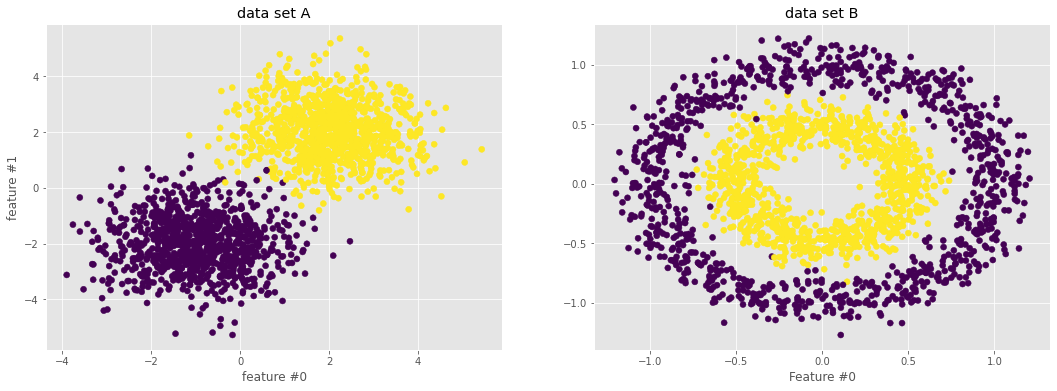

In [219]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(18,6))
ax[0].scatter(X1[:, 0], X1[:, 1], c=y1)
ax[0].set_ylabel("feature #1")
ax[0].set_xlabel("feature #0")
ax[0].set_title("data set A")

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2)
ax[1].set_xlabel("Feature #0")
ax[1].set_title("data set B")
fig.savefig('NonLinearData.png')

In [174]:
# 決定境界を可視化する関数を定義
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier, resolution=0.2):
    colors = ('yellow', 'blueviolet')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    cm = plt.cm.PuOr
    
    x1_min, x1_max = X[:,0].min()-0.2, X[:,0].max()+0.2
    x2_min, x2_max = X[:,1].min()-0.2, X[:,1].max()+0.2
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    z = classifier.predict_proba(np.array([xx1.ravel(), xx2.ravel()]).T)[:,1]
    z = z.reshape(xx1.shape)
    
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
    ax.contourf(xx1, xx2, z, alpha=0.5, cmap=cm)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    ax.set_xlabel('feature #0')
    ax.set_ylabel('feature #1')
    
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=1, c=[cmap(idx)], edgecolor='k', label=cl)
    ax.legend(loc='best')

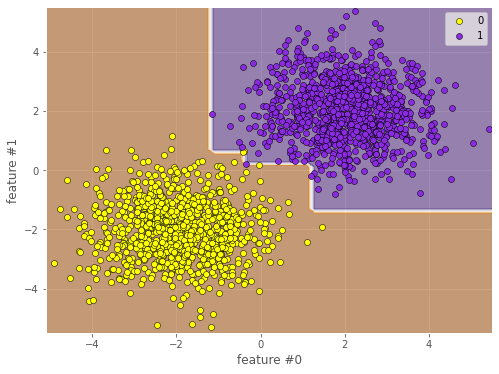

In [197]:
clf = DecisionTreeClassifier(max_depth=5, random_state=random_state)
#clf = LogisticRegression(random_state=0, max_iter=1000, penalty='none')
clf.fit(X1.reshape(-1,2), y1.ravel())
plot_decision_boundary(X, y, clf)

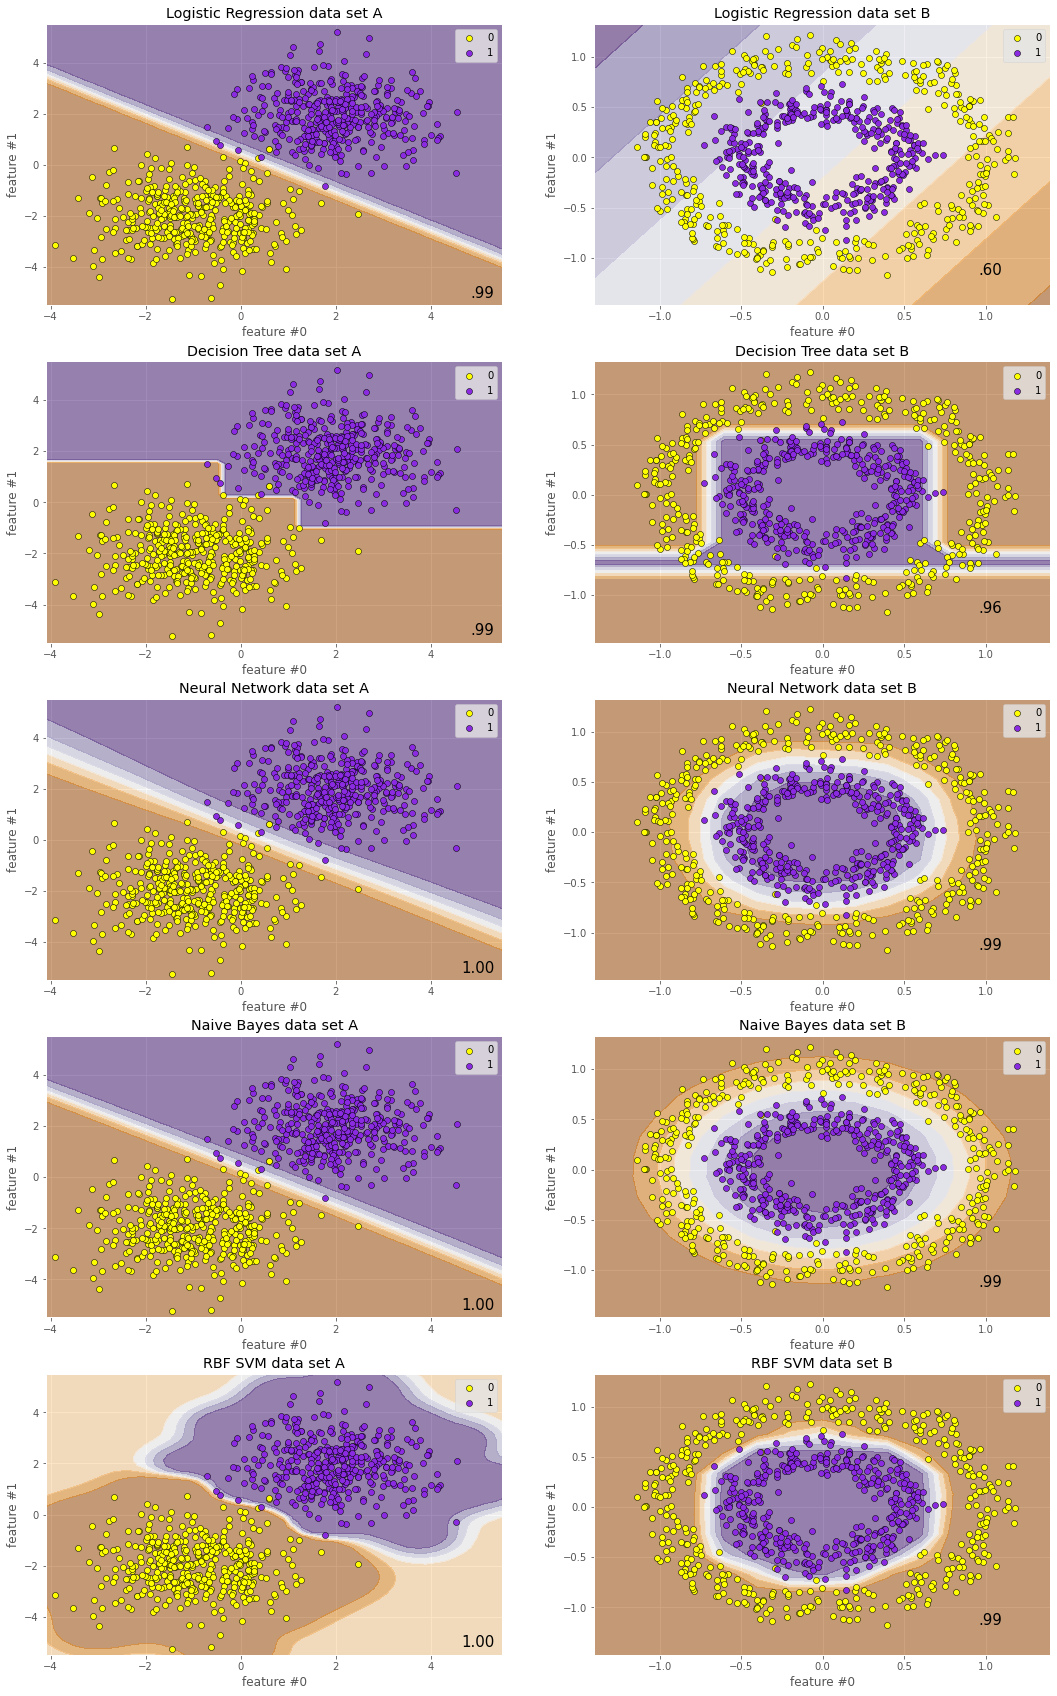

In [226]:
clf_names = [
        'Logistic Regression',
        'Decision Tree',
        'Neural Network',
        'Naive Bayes',
        'RBF SVM'
        ]
classifiers = [
               LogisticRegression(max_iter=1000, penalty='none', random_state=random_state),
               DecisionTreeClassifier(max_depth=5, random_state=random_state),
               MLPClassifier(alpha=1, max_iter=1000, random_state=random_state),
               GaussianNB(),
               SVC(gamma=2, C=1, probability=True, random_state=random_state)
               ]

ds_names = ['data set A', 'data set B']
datasets = [(X1,y1), (X2,y2)]

fig = plt.figure(figsize=(18, 30))
resolution = 0.2
i = 1
for clf_name, clf in zip(clf_names, classifiers):
    for ds_name, ds in zip(ds_names, datasets):
        X, y = ds
        train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=random_state, test_size=0.4)
        clf.fit(train_x.reshape(-1,2), train_y.ravel())
        score = clf.score(test_x.reshape(-1,2), test_y.ravel())
    
        colors = ('yellow', 'blueviolet')
        cmap = ListedColormap(colors[:len(np.unique(y))])
        cm = plt.cm.PuOr
    
        x1_min, x1_max = X[:,0].min()-0.2, X[:,0].max()+0.2
        x2_min, x2_max = X[:,1].min()-0.2, X[:,1].max()+0.2
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
        z = clf.predict_proba(np.array([xx1.ravel(), xx2.ravel()]).T)[:,1]
        z = z.reshape(xx1.shape)
        
        target_ax = fig.add_subplot(len(classifiers), len(datasets), i)
        target_ax.contourf(xx1, xx2, z, alpha=0.5, cmap=cm)
        target_ax.set_xlim(xx1.min(), xx1.max())
        target_ax.set_ylim(xx2.min(), xx2.max())
        target_ax.set_xlabel('feature #0')
        target_ax.set_ylabel('feature #1')
    
        for idx, cl in enumerate(np.unique(y)):
            target_ax.scatter(x=test_x[test_y==cl,0], y=test_x[test_y==cl,1], alpha=1, c=[cmap(idx)], edgecolor='k', label=cl)
        target_ax.legend(loc='best')
        target_ax.set_title(clf_name + ' ' + ds_name)
        target_ax.text(
            x1_max - 0.3,
            x2_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        
        i += 1
fig.savefig('NonLinearProblem.png')